# CLOUD COUNSELAGE LIVE PROJECT
## DATA SCIENCE PROJECT

### Problem Statement 
 Students from different cities from the state of Maharashtra had applied for the Cloud Counselage Internship Program. We have the data set of consisting information of all the students. Using this data we want to get more insights and draw out more meaningful conclusions. Interns are expected to build a data visualization model and find the best data segmentation model using the student’s dataset. 

Following are the tasks interns need to perform:
    
    1.Interns need to preprocess the data for missing values, unknown values, encoding categorical values.
    2.Create a data visualization model to build graphs from the data set answering the following questions:
        a.The number of students applied to different technologies.
        b.The number of students applied for Data Science who knew "Python” and who didn’t.
        c.The different ways students learned about this program.
        d.Students who are in the fourth year and have a CGPA greater than 8.0.
        e.Students who applied for Digital Marketing with verbal and written communication score greater than 8.
        f.Year-wise and area of study wise classification of students.
        g.City and college wise classification of students.
        h.Plot the relationship between the CGPA and the target variable.
        i.Plot the relationship between the Area of Interest and the target variable.
        j.Plot the relationship between the year of study, major, and the target variable.
    3.Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”.

### Import the required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None

### Create Dataframe

In [ ]:
df = pd.read_csv("DS_DATESET.csv")

In [ ]:
# Columns in the dataframe
df.columns

In [ ]:
# First five rows of dataframe
df.head()

In [5]:
# Shape of dataframe
df.shape

(10000, 32)

### Data Cleaning

#### Preprocess the data for missing values, unknown values, encoding categorical values.

In [6]:
# Null values sorted in descending order
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

link to Linkedin profile                                     100.0
Link to updated Resume (Google/ One Drive link preferred)    100.0
Certifications/Achievement/ Research papers                  100.0
Label                                                          0.0
Age                                                            0.0
College name                                                   0.0
Emergency Contact Number                                       0.0
Contact Number                                                 0.0
Email Address                                                  0.0
Gender                                                         0.0
Zip Code                                                       0.0
DOB [DD/MM/YYYY]                                               0.0
Degree                                                         0.0
State                                                          0.0
City                                                          

There are three columns in the data which contains 100% null values, so there is no other choice than dropping the columns.

In [7]:
# Check the data types of dataframe
df.dtypes

First Name                                                    object
Last Name                                                     object
City                                                          object
State                                                         object
Zip Code                                                       int64
DOB [DD/MM/YYYY]                                              object
Age                                                            int64
Gender                                                        object
Email Address                                                 object
Contact Number                                                 int64
Emergency Contact Number                                       int64
College name                                                  object
University Name                                               object
Degree                                                        object
Major/Area of Study               

In [8]:
# Drop the columns of null values
df.drop(['Certifications/Achievement/ Research papers', 'Link to updated Resume (Google/ One Drive link preferred)', 'link to Linkedin profile'],1,inplace=True)

In [9]:
# Check the data agian for null values
df.isnull().sum()

First Name                                                0
Last Name                                                 0
City                                                      0
State                                                     0
Zip Code                                                  0
DOB [DD/MM/YYYY]                                          0
Age                                                       0
Gender                                                    0
Email Address                                             0
Contact Number                                            0
Emergency Contact Number                                  0
College name                                              0
University Name                                           0
Degree                                                    0
Major/Area of Study                                       0
Course Type                                               0
Which-year are you studying in?         

Now, there are no null values in the data. So, we can move further and do EDA.

### Exploratory Data Analysis

#### Profile Report through Pandas Profiling

In [109]:
import pandas_profiling 
df.profile_report()

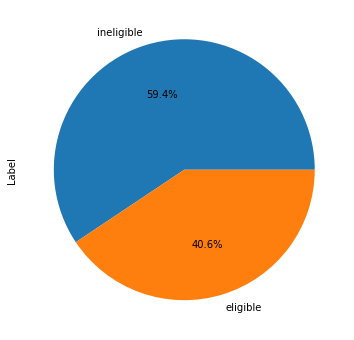

In [10]:
# Eligible and ineligble percentage
df.Label.value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.show()

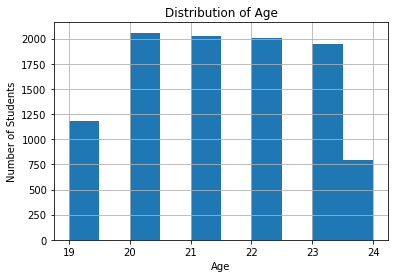

In [11]:
# Distribution of Age
df.Age.hist()
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.show()

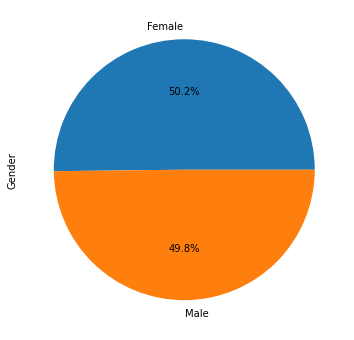

In [12]:
# Distribution of Gender
df.Gender.value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.show()

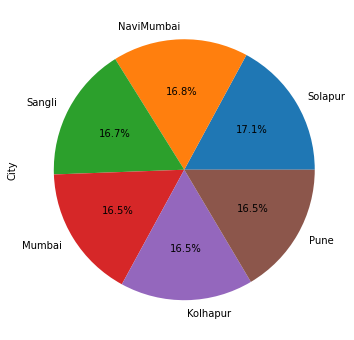

In [13]:
# Distribution of City
df.City.value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.show()

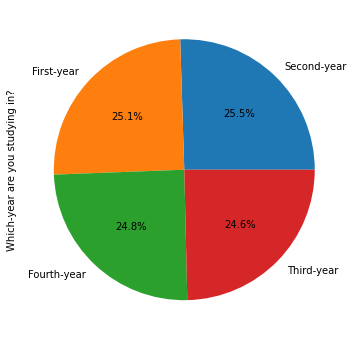

In [14]:
# Distribution of year studying in
df["Which-year are you studying in?"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.show()

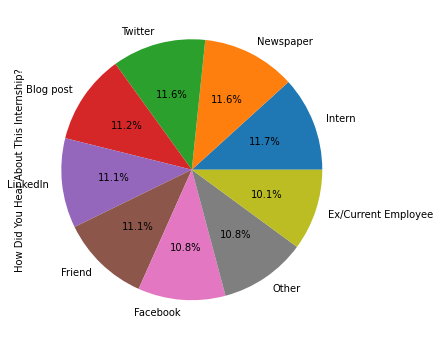

In [15]:
# Distribution of ways student learnt about Internship
df["How Did You Hear About This Internship?"].value_counts().plot.pie(figsize=(6,6), autopct='%1.1f%%')
plt.show()

#### a. The number of students applied to different technologies.

In [16]:
# Strip the data
df["Areas of interest"]=df["Areas of interest"].apply(lambda x: x.strip())

Removed all the leading and trailing spaces from the string.

In [17]:
# Value counts of students applied for different technologies
df["Areas of interest"].value_counts()

DevOps                     674
Machine Learning           671
Python                     652
Cyber Security             638
Web Development            637
QMS/Testing                633
Mobility                   631
IoT                        630
Artificial Intelligence    627
Digital Marketing          624
Blockchain                 623
Big Data                   612
Data Science               601
Information Security       598
RPA                        589
Cloud Computing            560
Name: Areas of interest, dtype: int64

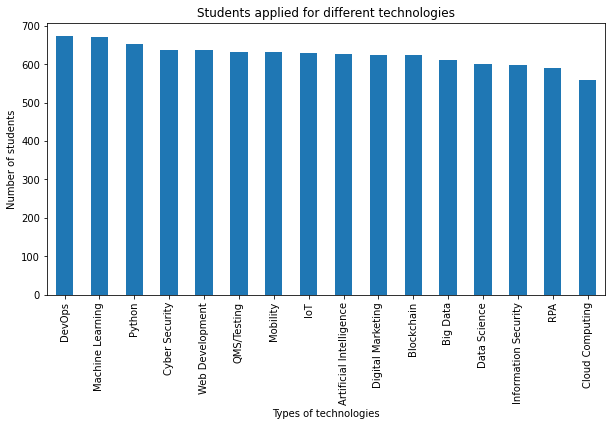

In [18]:
# Graph of students applied for different technologies
plt.figure(figsize=(10,5))
df["Areas of interest"].value_counts().plot(kind="bar")
plt.title("Students applied for different technologies")
plt.xlabel("Types of technologies")
plt.ylabel("Number of students")
plt.show()

There are 16 types of technologies for which the students have applied. The maximum students applied for DevOps followed by Machine Learning and the lowest is for Cloud Computing.

#### b. The number of students applied for Data Science who knew "Python” and who didn’t

In [19]:
# New dataframe showing students applied for Data Science who knew "Python” and who didn’t
dummy1 = df[df["Areas of interest"] == "Data Science"]["Programming Language Known other than Java (one major)"]

In [20]:
# Sorting values in yes and no using the apply method
var = dummy1.apply(lambda x: "YES" if x == "Python" else "NO").value_counts()

In [21]:
# Number of students applied for Data Science who knew "Python” and who didn’t
var

NO     535
YES     66
Name: Programming Language Known other than Java (one major), dtype: int64

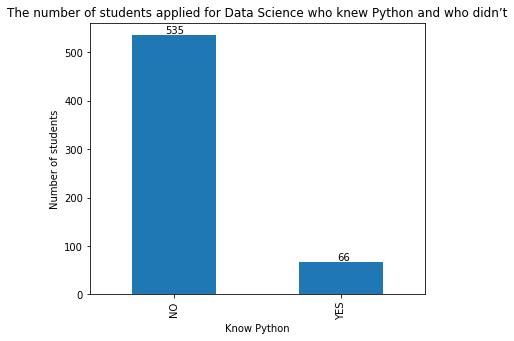

In [22]:
# Graph of students applied for Data Science who knew "Python” and who didn’t
var.plot.bar(figsize=(6,5))
plt.text(x = -0.05, y = var[0]+5, s = var[0])
plt.text(x = 0.98, y = var[1]+5, s = var[1])
plt.title("The number of students applied for Data Science who knew Python and who didn’t")
plt.xlabel("Know Python")
plt.ylabel("Number of students")
plt.show()

The total number of students applied for Data Science are 601 among which 635 students knew Python and 66 don't.

#### c. The different ways students learned about this program

In [23]:
# Different ways students learned about this program 
print(df["How Did You Hear About This Internship?"].nunique())

9


In [24]:
# Counts of different ways students learned about this program
df["How Did You Hear About This Internship?"].value_counts()

Intern                 1173
Newspaper              1162
Twitter                1160
Blog post              1116
LinkedIn               1112
Friend                 1109
Facebook               1084
Other                  1077
Ex/Current Employee    1007
Name: How Did You Hear About This Internship?, dtype: int64

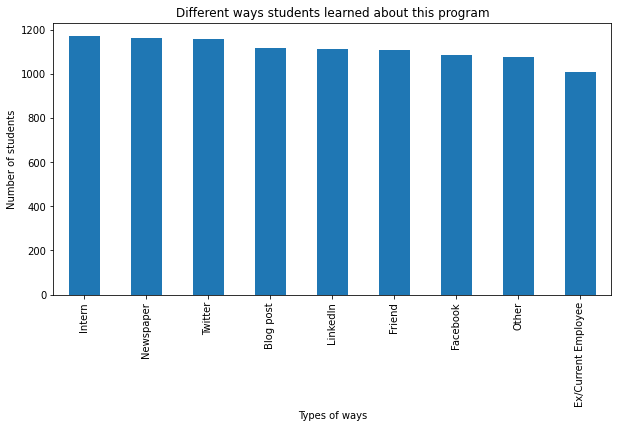

In [25]:
# Graph of different ways students learned about this program
df["How Did You Hear About This Internship?"].value_counts().plot.bar(figsize=(10,5))
plt.title("Different ways students learned about this program")
plt.xlabel("Types of ways")
plt.ylabel("Number of students")
plt.show()

There are 9 different ways students learnt about this program. The maximum students heard it from other interns followed by Newspaper and Twitter 

#### d. Students who are in the fourth year and have a CGPA greater than 8.0

In [26]:
# Number of students who are in the fourth year and have a CGPA greater than 8.0
len(df[(df["Which-year are you studying in?"]=="Fourth-year") & (df["CGPA/ percentage"]>8)])

1697

In [27]:
X = df[df["Which-year are you studying in?"]=="Fourth-year"]["CGPA/ percentage"].apply (lambda x: "Above 8 CGPA" if x > 8 else "equal or less than 8 CGPA").value_counts()

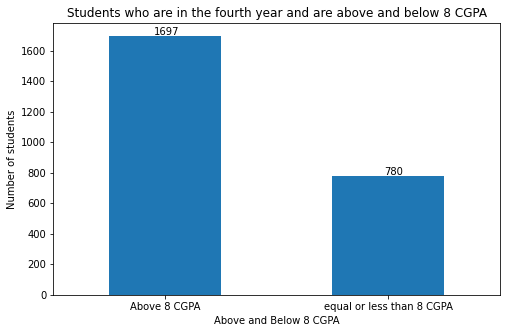

In [28]:
X.plot.bar(rot=360, figsize = (8,5))
plt.text(x = -0.05, y = X[0]+5, s = X[0])
plt.text(x = 0.98, y = X[1]+5, s = X[1])
plt.title("Students who are in the fourth year and are above and below 8 CGPA")
plt.xlabel("Above and Below 8 CGPA")
plt.ylabel("Number of students")
plt.show()

The number students who are in fourth year and have a CGPA greater than 8.0 are 1697 and 780 are who have equal or less that 8.0 CGPA

#### e. Students who applied for Digital Marketing with verbal and written communication score greater than 8

In [29]:
len(df[(df["Areas of interest"] == "Digital Marketing") & (df["Rate your written communication skills [1-10]"] > 8) & (df["Rate your verbal communication skills [1-10]"] > 8)])

92

In [30]:
len(df[(df["Areas of interest"] == "Digital Marketing") & ( (df["Rate your written communication skills [1-10]"] <= 8) | (df["Rate your verbal communication skills [1-10]"] <= 8))])

532

In [31]:
# Number of students who applied for Digital Marketing with verbal and written communication score greater than 8
a={}
a["Greater than 8"]=len(df[(df["Areas of interest"] == "Digital Marketing") & (df["Rate your written communication skills [1-10]"] > 8) & (df["Rate your verbal communication skills [1-10]"] > 8)])
a["Less than 8"] = len(df[(df["Areas of interest"] == "Digital Marketing") & ( (df["Rate your written communication skills [1-10]"] <= 8) | (df["Rate your verbal communication skills [1-10]"] <= 8))])


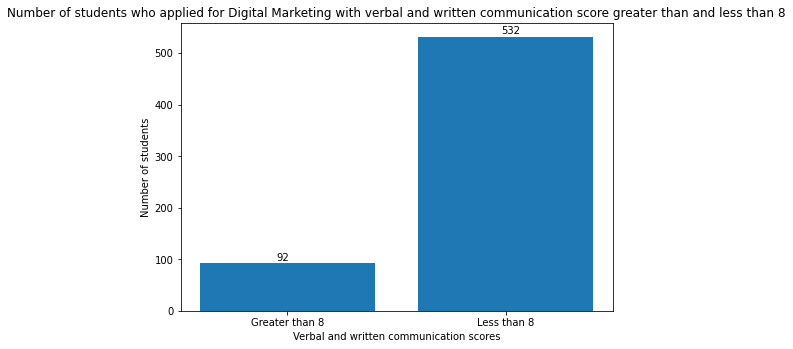

In [32]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
score = list(a.keys())
students = list(a.values())
ax.bar(score,students)
plt.text(x = -0.05, y = students[0]+5, s = students[0])
plt.text(x = 0.98, y = students[1]+5, s = students[1])
plt.title("Number of students who applied for Digital Marketing with verbal and written communication score greater than and less than 8")
plt.xlabel("Verbal and written communication scores")
plt.ylabel("Number of students")
plt.show()

The number of students who applied for Digital Marketing and have verbal and written communication scores greater than 8 are 92 and have less than 8 are 532.

#### f. Year-wise and area of study wise classification of students

In [33]:
df.groupby(["Which-year are you studying in?","Major/Area of Study"])["Which-year are you studying in?"].count().unstack("Major/Area of Study")

Major/Area of Study              Computer Engineering  Electrical Engineering  \
Which-year are you studying in?                                                 
First-year                                       1470                     490   
Fourth-year                                      1516                     464   
Second-year                                      1536                     518   
Third-year                                       1449                     561   

Major/Area of Study              Electronics and Telecommunication  
Which-year are you studying in?                                     
First-year                                                     550  
Fourth-year                                                    497  
Second-year                                                    496  
Third-year                                                     453

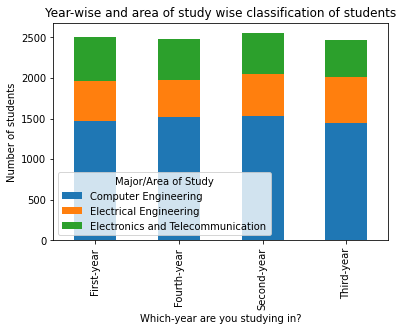

In [34]:
# Graph of year-wise and area of study wise classification of students
df.groupby(["Which-year are you studying in?","Major/Area of Study"])["Which-year are you studying in?"].count().unstack("Major/Area of Study").plot(kind='bar', stacked=True)
plt.title("Year-wise and area of study wise classification of students")
plt.ylabel("Number of students")
plt.show()

There are three area of study in this data, “Computer Engineering”, “Electrical Engineering” and “Electronics and Telecommunication Engineering” with four years of study. The visualization of this is shown with the number of students applied respectively.

#### g. City and college wise classification of students

In [35]:
df.groupby(["City", "College name"])["First Name"].count().reset_index(1)

College name  First Name
City                                                                     
Kolhapur            Bharati Vidyapeeth College of Engineering         834
Kolhapur       DY Patil College of Engineering And Technology         813
Mumbai                   K. J. Somaiya College of Engineering         220
Mumbai                   Rajiv Gandhi Institute of Technology         201
Mumbai                           Rizvi College of Engineering         222
Mumbai                    St. Francis Institute of Technology         189
Mumbai                   Thadomal Shahani Engineering College         192
Mumbai           Thakur College Of Engineering And Technology         206
Mumbai                    Vidyalankar Institute of Technology         207
Mumbai                        Xavier Institute of Engineering         211
NaviMumbai                 A. C. Patil College of Engineering         309
NaviMumbai                     Karamveer Bhauro Patil College         378
NaviMumbai  Mahatma Gandhi Mission's College of Engineerin...         329
NaviMumbai                      Pillai College of Engineering         356
NaviMumbai                Ramrao Adik Institute of Technology         306
Pune                       D. Y. Patil College of Engineering         338
Pune                Jayawantrao Sawant College of Engineering         327
Pune                    Pune Institute of Computer Technology         329
Pune                           Sinhgad College of Engineering         340
Pune          Vishwakarma Institute of Information Technology         313
Sangli                    Rajarambapu Institute of Technology        1670
Solapur     Bharat Ratna Indira Gandhi College of Engineering         417
Solapur             Brahmdevdada Mane Institute of Technology         428
Solapur                    Skn Sinhgad College of Engineering         431
Solapur                      Walchand Institute of Technology         434

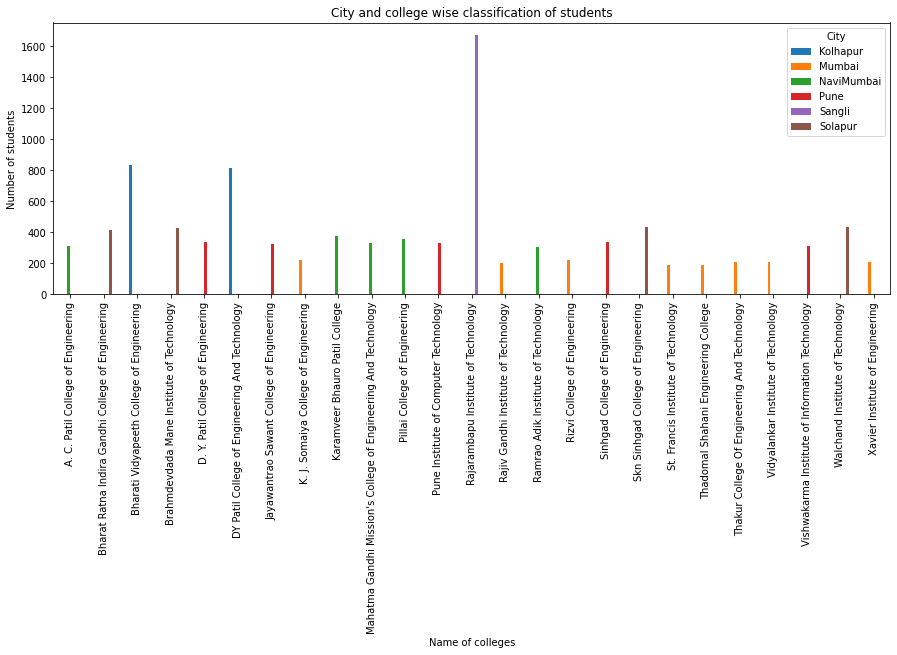

In [36]:
df.groupby(["City", "College name"])["College name"].count().unstack("City").plot(kind='bar', figsize=(15,5))
plt.title("City and college wise classification of students")
plt.xlabel("Name of colleges")
plt.ylabel("Number of students")
plt.show()

The students applied from six different cities, “Mumbai”, “Navi Mumbai”, “Pune”, “Kolhapur”, “Sangli”, and “Solapur” and from different colleges of this cites. The visualization of this is shown with the number of students applied from these cities with respective to their colleges.

#### h. Plot the relationship between the CGPA and the target variable

In [37]:
# New dataframe consisting CGPA and the target variable columns
df_new = df[['CGPA/ percentage',"Label"]]

In [38]:
bins = [7,7.5,8,8.5,9,9.5,10]
labels = ['7.0 - 7.5', '7.5 - 8.0','8.0 - 8.5', '8.5 - 9.0','9.0 to 9.5','9.5 - 10']

In [39]:
df_new["Class-Interval"] = pd.cut(df_new["CGPA/ percentage"],bins=bins,labels=labels)

/Users/muustafaqureshii/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_new.groupby(["Class-Interval","Label"])["Class-Interval"].count().unstack("Label")

Label           eligible  ineligible
Class-Interval                      
7.0 - 7.5             15        1607
7.5 - 8.0            816         867
8.0 - 8.5            808         874
8.5 - 9.0            830         863
9.0 to 9.5           840         865
9.5 - 10             754         840

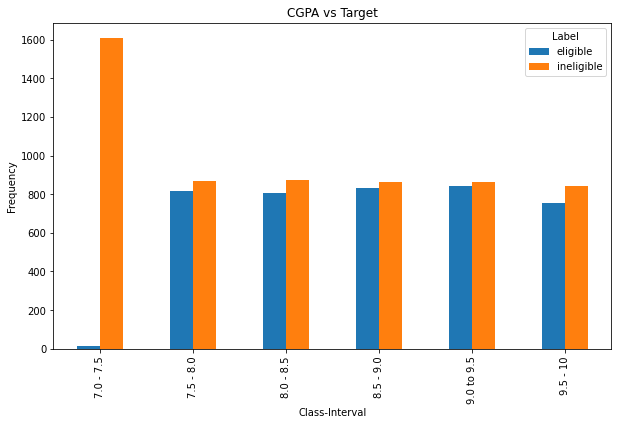

In [41]:
# Graph of relationship between the CGPA and the target variable
df_new.groupby(["Class-Interval","Label"])["Class-Interval"].count().unstack("Label").plot.bar(figsize=(10,6))
plt.title('CGPA vs Target')
plt.xlabel("Class-Interval")
plt.ylabel("Frequency")
plt.show()

The target variable consists of two values of eligible and ineligible students for this Internship and the CGPA is distributed in 6 intervals with 0.5 difference from 7 to 10, so this visualization is of number of students with different CGPA among which how many are eligible and not. 

#### i. Plot the relationship between the Area of Interest and the target variable

In [42]:
# New dataframe consisting area of Interest and the target variable columns
df_new1 = df.groupby(['Areas of interest',"Label"])['Areas of interest'].count().unstack("Label")

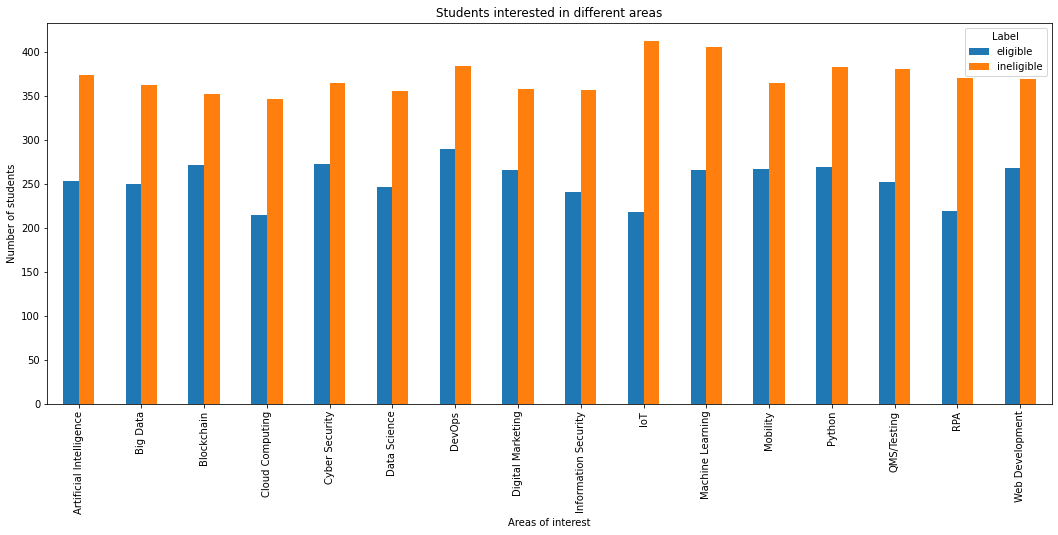

In [43]:
# Graph of students interested in different areas
df_new1.plot.bar(figsize=(18,7))
plt.title("Students interested in different areas")
plt.ylabel("Number of students")
plt.show()

In [44]:
# New columns of Percentage_eligible and Percentage_ineligible
df_new1["Percentage_eligible"] = df_new1["eligible"]*100/(df_new1["eligible"]+df_new1["ineligible"])
df_new1["Percentage_ineligible"] =100- df_new1["Percentage_eligible"]

In [45]:
df_new1

Label                    eligible  ineligible  Percentage_eligible  \
Areas of interest                                                    
Artificial Intelligence       253         374            40.350877   
Big Data                      250         362            40.849673   
Blockchain                    271         352            43.499197   
Cloud Computing               214         346            38.214286   
Cyber Security                273         365            42.789969   
Data Science                  246         355            40.931780   
DevOps                        290         384            43.026706   
Digital Marketing             266         358            42.628205   
Information Security          241         357            40.301003   
IoT                           218         412            34.603175   
Machine Learning              266         405            39.642325   
Mobility                      267         364            42.313788   
Python                        269         383            41.257669   
QMS/Testing                   252         381            39.810427   
RPA                           219         370            37.181664   
Web Development               268         369            42.072214   

Label                    Percentage_ineligible  
Areas of interest                               
Artificial Intelligence              59.649123  
Big Data                             59.150327  
Blockchain                           56.500803  
Cloud Computing                      61.785714  
Cyber Security                       57.210031  
Data Science                         59.068220  
DevOps                               56.973294  
Digital Marketing                    57.371795  
Information Security                 59.698997  
IoT                                  65.396825  
Machine Learning                     60.357675  
Mobility                             57.686212  
Python                               58.742331  
QMS/Testing                          60.189573  
RPA                                  62.818336  
Web Development                      57.927786

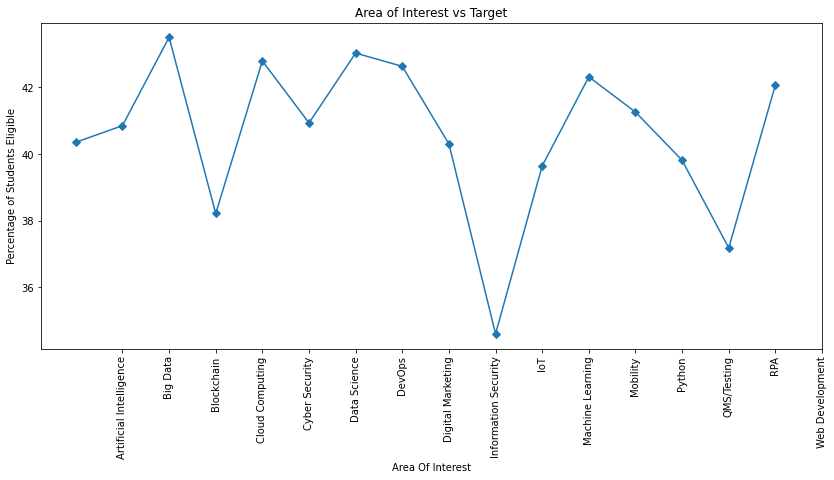

In [46]:
# Graph of relationship between the Area of Interest and the target variable
plt.figure(figsize=(14,6))
plt.title("Area of Interest vs Target")
plt.xlabel("Area Of Interest")
plt.ylabel("Percentage of Students Eligible")
plt.plot(df_new1["Percentage_eligible"],marker="D")
plt.xticks(ticks=range(1,17),labels=list(df_new1.index),rotation="vertical")
plt.show()

As discussed before there are 16 different area of interests and in target variable there are two values, so this visualization is of number of students who applied for different technologies and among them how many are eligible and not.

#### j. Plot the relationship between the year of study, major, and the target variable

In [47]:
# New dataframe consisting Major/Area of Study, Which-year are you studying in? and the target variable
df_new2=df.groupby(['Major/Area of Study','Which-year are you studying in?','Label'])['Major/Area of Study'].count().unstack(['Label'])

In [48]:
# New column of Percentage_eligible
df_new2["Percent_Eligible"] = df_new2["eligible"]*100/(df_new2["eligible"]+df_new2["ineligible"])

In [49]:
df_new2=df_new2.fillna(0)

In [50]:
df_new2

Label                                                              eligible  \
Major/Area of Study               Which-year are you studying in?             
Computer Engineering              First-year                            0.0   
                                  Fourth-year                         815.0   
                                  Second-year                         818.0   
                                  Third-year                          801.0   
Electrical Engineering            First-year                            0.0   
                                  Fourth-year                         259.0   
                                  Second-year                         274.0   
                                  Third-year                          302.0   
Electronics and Telecommunication First-year                            0.0   
                                  Fourth-year                         275.0   
                                  Second-year                         273.0   
                                  Third-year                          246.0   

Label                                                              ineligible  \
Major/Area of Study               Which-year are you studying in?               
Computer Engineering              First-year                           1470.0   
                                  Fourth-year                           701.0   
                                  Second-year                           718.0   
                                  Third-year                            648.0   
Electrical Engineering            First-year                            490.0   
                                  Fourth-year                           205.0   
                                  Second-year                           244.0   
                                  Third-year                            259.0   
Electronics and Telecommunication First-year                            550.0   
                                  Fourth-year                           222.0   
                                  Second-year                           223.0   
                                  Third-year                            207.0   

Label                                                              Percent_Eligible  
Major/Area of Study               Which-year are you studying in?                    
Computer Engineering              First-year                               0.000000  
                                  Fourth-year                             53.759894  
                                  Second-year                             53.255208  
                                  Third-year                              55.279503  
Electrical Engineering            First-year                               0.000000  
                                  Fourth-year                             55.818966  
                                  Second-year                             52.895753  
                                  Third-year                              53.832442  
Electronics and Telecommunication First-year                               0.000000  
                                  Fourth-year                             55.331992  
                                  Second-year                             55.040323  
                                  Third-year                              54.304636

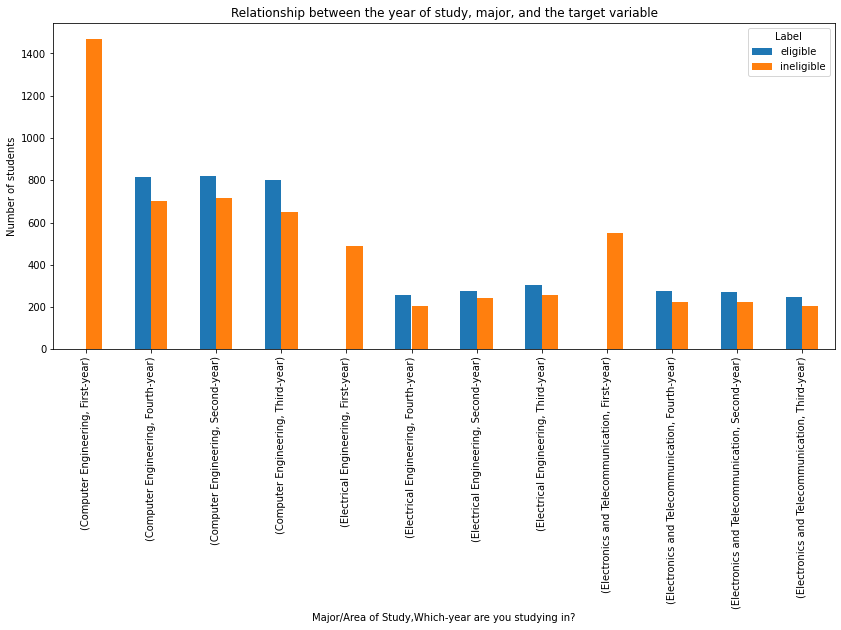

In [51]:
df_new2[["eligible" ,"ineligible"]].plot.bar(figsize=(14,6))
plt.title("Relationship between the year of study, major, and the target variable")
plt.ylabel("Number of students")
plt.show()

As discussed before there are three area of study in this data, “Computer Engineering”, “Electrical Engineering” and “Electronics and Telecommunication Engineering” with four years of study, so this visualization is showing the relationship between these two and the target variable as how many students are eligible and not among these.

### Predictive Modelling

#### Identify the best binary classifier to classify data into “eligible/1” and “not eligible/0”

In [52]:
X=df[['Age', 'Gender','Major/Area of Study', 'Which-year are you studying in?',
       'CGPA/ percentage', 'Areas of interest','Have you worked core Java',
       'Programming Language Known other than Java (one major)',
       'Have you worked on MySQL or Oracle database',
       'Have you studied OOP Concepts',
       'Rate your written communication skills [1-10]',
       'Rate your verbal communication skills [1-10]']]

In [53]:
y=df["Label"]

In [54]:
X.shape,y.shape

((10000, 12), (10000,))

In [55]:
X=pd.get_dummies(X,drop_first=True)

In [56]:
x_col=X.columns

In [57]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [58]:
# Encode the data into “eligible/1” and “not eligible/0”
y = y.apply(lambda x: 1 if x == 'eligible' else 0)

In [59]:
X = pd.DataFrame(X,columns = x_col)

In [60]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=142)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 35), (2000, 35), (8000,), (2000,))

In [62]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X_train, y_train)

In [63]:
# import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [64]:
y.value_counts()

0    5937
1    4063
Name: Label, dtype: int64

In [65]:
dt = DecisionTreeClassifier(random_state = 142)
rf = RandomForestClassifier(random_state = 142)
lr = LogisticRegression(random_state = 142, max_iter=1000)
kn = KNeighborsClassifier(n_neighbors = 1)

In [66]:
# fit the data
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
lr.fit(X_train,y_train)
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [67]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
kn_pred = kn.predict(X_test)

In [68]:
# import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

##### Decision Tree

In [69]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, dt_pred))

Accuracy is: 1.0


In [70]:
# print f1 score
print("f1 score is:", f1_score(y_test, dt_pred))

f1 score is: 1.0


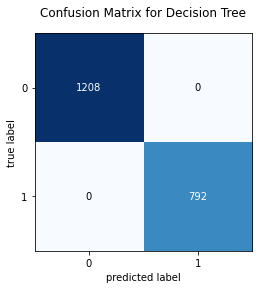

In [71]:
# print confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dt_pred), figsize=(4,4))
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [72]:
print("classification_report is:", classification_report(y_test, dt_pred))

classification_report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      1.00      1.00       792

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



##### Random Forest

In [73]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, rf_pred))

Accuracy is: 1.0


In [74]:
# print f1 score
print("f1 score is:", f1_score(y_test, rf_pred))

f1 score is: 1.0


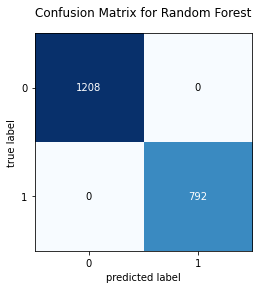

In [75]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rf_pred), figsize=(4,4))
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [76]:
print("classification_report is:", classification_report(y_test, rf_pred))

classification_report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1208
           1       1.00      1.00      1.00       792

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



##### Logistic Regression

In [77]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, lr_pred))

Accuracy is: 0.8365


In [78]:
# print f1 score
print("f1 score is:", f1_score(y_test, lr_pred))

f1 score is: 0.7982726711906232


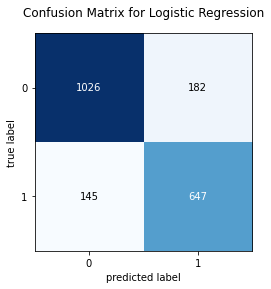

In [79]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lr_pred))
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [80]:
print("classification_report is:", classification_report(y_test, lr_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1208
           1       0.78      0.82      0.80       792

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



##### KNN

In [81]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, kn_pred))

Accuracy is: 0.8045


In [82]:
# print f1 score
print("f1 score is:", f1_score(y_test, kn_pred))

f1 score is: 0.7566894835096453


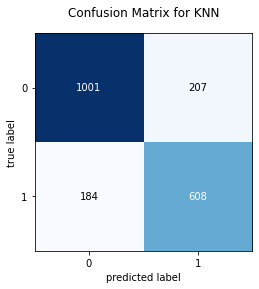

In [83]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, kn_pred), figsize=(4,4))
plt.title("Confusion Matrix for KNN")
plt.show()

In [84]:
print("classification_report is:", classification_report(y_test, kn_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1208
           1       0.75      0.77      0.76       792

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000



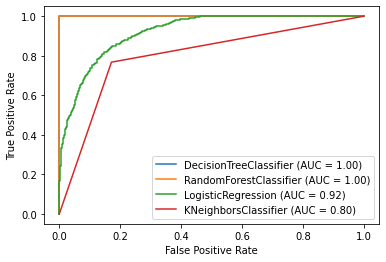

In [85]:
from sklearn.metrics import plot_roc_curve

classifiers = [dt, rf, lr, kn]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

#### The best model is Decision Tree and Random Forest  which gives the accuracy of 100%. But I will be going with Decision tree as Decision tree is simple model and uses less resources than Random Forest

#### Using the feature importance for finding out the most important columns, to get the best model

### Feature Importance

In [86]:
for i, j in zip(x_col,rf.feature_importances_):
    print(i,round(j*100,2))


Age 2.06
CGPA/ percentage 18.18
Rate your written communication skills [1-10] 20.29
Rate your verbal communication skills [1-10] 21.48
Gender_Male 0.72
Major/Area of Study_Electrical Engineering 0.56
Major/Area of Study_Electronics and Telecommunication 0.6
Which-year are you studying in?_Fourth-year 8.4
Which-year are you studying in?_Second-year 9.31
Which-year are you studying in?_Third-year 9.42
Areas of interest_Big Data 0.24
Areas of interest_Blockchain 0.28
Areas of interest_Cloud Computing 0.25
Areas of interest_Cyber Security 0.26
Areas of interest_Data Science 0.25
Areas of interest_DevOps 0.25
Areas of interest_Digital Marketing 0.26
Areas of interest_Information Security 0.26
Areas of interest_IoT 0.28
Areas of interest_Machine Learning 0.27
Areas of interest_Mobility 0.27
Areas of interest_Python 0.26
Areas of interest_QMS/Testing 0.26
Areas of interest_RPA 0.29
Areas of interest_Web Development 0.27
Have you worked core Java_Yes 0.64
Programming Language Known other than 

In [87]:
X_train

Age  CGPA/ percentage  Rate your written communication skills [1-10]  \
4665   20              7.21                                              9   
7168   22              9.36                                              8   
7132   22              9.41                                              9   
939    22              7.12                                              9   
4908   19              7.10                                              9   
...   ...               ...                                            ...   
6317   19              9.54                                              7   
5146   20              7.92                                              8   
7436   20              8.57                                              8   
7365   23              9.66                                              6   
277    20              7.75                                              8   

      Rate your verbal communication skills [1-10]  Gender_Male  \
4665                                             8            0   
7168                                             8            1   
7132                                             8            0   
939                                              8            1   
4908                                             8            1   
...                                            ...          ...   
6317                                             7            0   
5146                                             8            0   
7436                                             8            0   
7365                                             7            0   
277                                              8            0   

      Major/Area of Study_Electrical Engineering  \
4665                                           0   
7168                                           0   
7132                                           0   
939                                            0   
4908                                           0   
...                                          ...   
6317                                           0   
5146                                           0   
7436                                           1   
7365                                           0   
277                                            0   

      Major/Area of Study_Electronics and Telecommunication  \
4665                                                  0       
7168                                                  0       
7132                                                  0       
939                                                   1       
4908                                                  0       
...                                                 ...       
6317                                                  0       
5146                                                  0       
7436                                                  0       
7365                                                  0       
277                                                   1       

      Which-year are you studying in?_Fourth-year  \
4665                                            0   
7168                                            0   
7132                                            0   
939                                             0   
4908                                            0   
...                                           ...   
6317                                            0   
5146                                            0   
7436                                            0   
7365                                            0   
277                                             0   

      Which-year are you studying in?_Second-year  \
4665                                            1   
7168                                            1   
7132                                            0   
939                              

In [88]:
# splitting data into X_train
X_train = X_train[["CGPA/ percentage", "Rate your written communication skills [1-10]", "Rate your verbal communication skills [1-10]"]]

In [89]:
# splitting data into X_test
X_test = X_test[["CGPA/ percentage", "Rate your written communication skills [1-10]", "Rate your verbal communication skills [1-10]"]]

In [90]:
# fit the data
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
lr.fit(X_train,y_train)
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [91]:
dt_pred = rf.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
kn_pred = kn.predict(X_test)

##### Decision Tree

In [92]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, dt_pred))

Accuracy is: 0.812


In [93]:
# print f1 score
print("f1 score is:", f1_score(y_test, dt_pred))

f1 score is: 0.7701711491442543


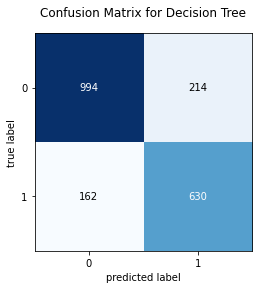

In [94]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, dt_pred), figsize=(4,4))
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [95]:
print("classification_report is:", classification_report(y_test, dt_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1208
           1       0.75      0.80      0.77       792

    accuracy                           0.81      2000
   macro avg       0.80      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



##### Random Forest

In [96]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, rf_pred))

Accuracy is: 0.812


In [97]:
# print f1 score
print("f1 score is:", f1_score(y_test, rf_pred))

f1 score is: 0.7701711491442543


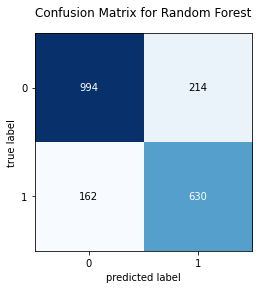

In [98]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rf_pred), figsize=(4,4))
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [99]:
print("classification_report is:", classification_report(y_test, rf_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1208
           1       0.75      0.80      0.77       792

    accuracy                           0.81      2000
   macro avg       0.80      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



##### Logistic Regression

In [100]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, lr_pred))

Accuracy is: 0.7125


In [101]:
# print f1 score
print("f1 score is:", f1_score(y_test, lr_pred))

f1 score is: 0.6174318030605456


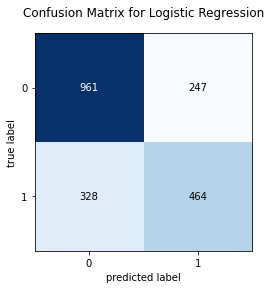

In [102]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, lr_pred),figsize=(4,4))
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [103]:
print("classification_report is:", classification_report(y_test, lr_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.75      0.80      0.77      1208
           1       0.65      0.59      0.62       792

    accuracy                           0.71      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.71      0.71      0.71      2000



##### KNN

In [104]:
# print accuracy
print("Accuracy is:", accuracy_score(y_test, kn_pred))

Accuracy is: 0.801


In [105]:
# print f1 score
print("f1 score is:", f1_score(y_test, kn_pred))

f1 score is: 0.7503136762860728


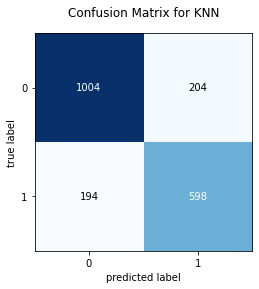

In [106]:
# print confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, kn_pred), figsize=(4,4))
plt.title("Confusion Matrix for KNN")
plt.show()

In [107]:
print("classification_report is:", classification_report(y_test, kn_pred))

classification_report is:               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1208
           1       0.75      0.76      0.75       792

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



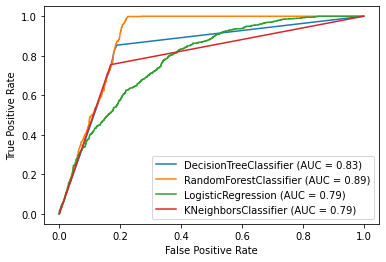

In [108]:
from sklearn.metrics import plot_roc_curve

classifiers = [dt, rf, lr, kn]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

#### After using the only  feature important features,  Decision Tree and Random Forest are able to predict with 81.2% accuracy with 77% f1 score.

### Conclusion

In this study, I analysed the candidates scores and their skills based on which their eligibility was depended for the Internship. I identified CGPA, Written communication skills and Verbal communication skills are the most important features which affect the selection of the candidate. I built classification models to predict which candidates are eligible/ineligible. These models can be very useful in helping other companies in number of ways. For example, it could help identify the candidates who are more deserving and eligible for the posts available in the company.

Some of the analysis I observed as follows:
1. Most of the students with CGPA above 7.5 are eligible for the Internship.
2. Most of the eligible students are from the second, third and last year.
3. Highest selection percentage is for Blockchain and the lowest is for the IoT.
4. Most of the students applied for the Internship are from the Computer Engineering background.
5. Using Random forest, every time we were able to get almost correct predictions.